In [1]:
from analysis import tf_idf

X_by_line = tf_idf.get_lines_tf_idf('../data/raw/dataset_poll_fr.csv')

In [2]:
lines, X = zip(*X_by_line.items())

/home/arnaud/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


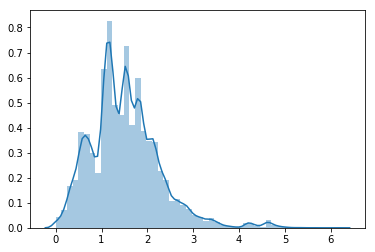

In [3]:
# Plotting distribution of distances
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import seaborn as sns
%matplotlib inline

nana = distance_matrix(X, X)
dists = nana.reshape((-1, 1))
sns.distplot(dists)
plt.show()


In [4]:
# Let's try to DB-Scan with smaller distance of 1
from collections import Counter
from sklearn.cluster import DBSCAN
clf = DBSCAN(eps=1)
labels = clf.fit_predict(X)
print(Counter(labels))

Counter({-1: 162, 0: 155})


In [5]:
# Finds that 284 propositions are unclustered,
# and 155 belongs to same cluster
# So it does not find small group of similar proposition.
# Try smaller epsilon
clf = DBSCAN(eps=.25)
labels = clf.fit_predict(X)
print(Counter(labels))

Counter({-1: 276, 0: 41})


In [6]:
# Let's see which lines are together
from pprint import pprint

# Sample of splitted lines
for line in lines[:10]:
    print(line)


Il faut que les élites est les élus montre le bon exemple et diminuent leur train de vie et que l on arrête avec les privilèges de la classe politique et de salaires indécents des hauts fonctionnaires
 Il sera aussi une perte en impôt sur le revenu en prélèvements sociaux en taxes diverses et en TVA sans oublier sa consommation de biens et de services
 Élection à la proportionnelle pour les législatives
Il faudrait aussi une refonte de l école les enfants ne savent plus lire à croire que c est voulu pour faire un futur pays d illetrés 
Je voudrais que chacun de nous est ça place que chacun puisse s épanouir
J ose espérer que la collation de toutes les remarques et suggestions des français seront traitées avec serieux et justesse et n auront pas été qu un subterfuge donnant l illusion que l on porte intérêt à leurs avis
La même justice pour tous
 Qui devra se soumettre à tout moment au contrôle d une commission du peuple en cas de litige
 parents ne se soucient pas
L ISF était le plus g

In [7]:
clustered_lines = [line for line, label in zip(lines, labels) if label == 0]
for line in clustered_lines[:20]:
    print(line)


La même justice pour tous
Pouvoir d achat Finir les fins de mois
Revoir l administration française car ils ont l air d avoir du mal a être a jour
mais vue se que l on me prend sur ma paye 
 Annulation des taxes sur les produits de première nécessité
Il nous faut un gouvernement qui pense avant tout à la France et aux français
TVA de 5 5 sur tout les produits de nécessité 
plus de contrôle dans les familles
Il faut arrêter de monter toutes sortes de taxes 
stop à la paie des politiques si plus de 2 absences
 Obligation de payer ses impôts en France pour tous citoyens français 
Création de quotas de migrants tout en les accueillants dignement 
 je ne demande pas que l on donne tout a tout le monde 
 Ce qui permettrait aux familles de 2 enfants et plus de gagner en pouvoir d achat
Limitation de la TVA et ne plus pouvoir y toucher
Revoir les retraites sans CSG
je demande juste d avoir le droit au bien immobilier meme si je suis seul 
Imposé toutes les grosses sociétés en France
Il faut une

In [8]:
# After analysis, this approach finds that, are similar, propositions with very few words
# (So, with few words in sentence, the difference between words in one and not in the other is not very big.)

In [9]:
from analysis import word_to_vec

X_by_line = word_to_vec.get_x_by_line('../data/raw/dataset_poll_fr.csv', '../data/raw/cc.fr.300.vec.gz')

In [10]:
lines, X = zip(*X_by_line.items())

/home/arnaud/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


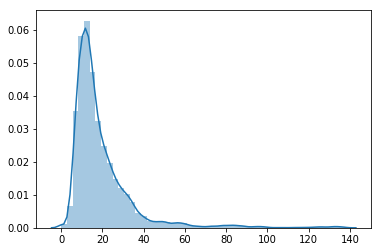

In [11]:
# Plotting distribution of distances
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import seaborn as sns
%matplotlib inline

nana = distance_matrix(X, X)
dists = nana.reshape((-1, 1))
sns.distplot(dists)
plt.show()


In [12]:
# Still, whatever I try, all documents are clustered in same group
from collections import Counter
from sklearn.cluster import DBSCAN
clf = DBSCAN(eps=5)
labels = clf.fit_predict(X)
print(Counter(labels))

Counter({-1: 243, 0: 74})
